    面积     价格
0   56   7800
1  104   9000
2  156   9200
3  200  10000
4  250  11000
5  300  12000
[[170]]
回归系数:  [[16.32229076]]
截距:  [6933.4063421]
预测值:  [[9708.19577086]]


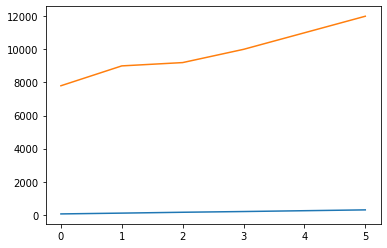

In [8]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = [[56, 7800], [104, 9000], [156, 9200], [200, 10000], [250, 11000], [300, 12000]]
columns = ['面积', '价格']
df = pd.DataFrame(data = data, columns = columns)
x = pd.DataFrame(df['面积'])
y = pd.DataFrame(df['价格'])
print(df)
clf = linear_model.LinearRegression()
clf.fit(x, y)     # 拟合线性模型
k = clf.coef_     # 回归系数
b = clf.intercept_ # 截距
x0 = np.array([[170]])
print(x0)
# 通过给定的x0预测y0，y0=截距+x值*回归系数
y0 = clf.predict(x0)
print('回归系数: ', k)
print('截距: ', b)
print('预测值: ', y0)
plt.plot(df)
# plt.plot(x0, y0)
plt.show()